### Data prep

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import glob as glob
import pandas as pd
from keras.models import load_model
import seaborn as sns
#importing required modules

In [2]:
test_dir = './test'
#setting directory in this folder
print(test_dir)
#printing directories to be sure
IMG_SIZE = (224, 224)
#setting resultion for later

./test


In [3]:
batch_size = 150
#setting bach size
img_height = 224
img_width = 224
#setting height and width seperatly
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=123,
#splitting training ds and testing ds with the same seed to it can be replicated
image_size=(img_height, img_width),
#setting image size
batch_size=batch_size)
#setting parameters of test data to match training data

Found 500 files belonging to 100 classes.


In [6]:
vgg_model = load_model('.vgg_model')
adam_model = load_model('.adam_model')
RMSprop_model = load_model('.RMSprop_model')
mobilenetv2_model = load_model('.mobilenetv2_model')
resnet_model = load_model('.resnet_model')
models = {'VGG-16': vgg_model, 'adam': adam_model, 'RMSprop' : RMSprop_model, 'Mobilenet v2' : mobilenetv2_model, 'Resnet-50' : resnet_model}
#loading in previously generated models and adding to dictionary 

### Results

In [7]:
def evaluate_dict (model_dict):
    results_df = pd.DataFrame()
    for k,v in model_dict.items():
        print(k)
        results_df[k] = v.evaluate(test_dataset)
    return (results_df)
#function to evaluate the dictionary of models and report findings 

In [28]:
results = evaluate_dict(models)
#reporting the findings 

VGG-16
4/4 [==============================] - 43s 10s/step - loss: 0.3106 - accuracy: 0.9260
adam
4/4 [==============================] - 12s 3s/step - loss: 1.5943 - accuracy: 0.5600
RMSprop
4/4 [==============================] - 12s 3s/step - loss: 1.7119 - accuracy: 0.5520
Mobilenet v2
4/4 [==============================] - 6s 1s/step - loss: 0.3637 - accuracy: 0.9360
Resnet-50
4/4 [==============================] - 19s 4s/step - loss: 0.2318 - accuracy: 0.9520


In [29]:
print(results)
#checking findings

     VGG-16      adam   RMSprop  Mobilenet v2  Resnet-50
0  0.310597  1.594309  1.711928      0.363664   0.231789
1  0.926000  0.560000  0.552000      0.936000   0.952000


In [43]:
results =results.rename(index={0:'loss',1: 'accuracy'})
results
results_df_transposed = results.T
#reindexing and transposing the data so it is easier to looka t 


In [44]:
results_df_transposed['model'] = results_df_transposed.index
#reindexing to add the model column for the plots


In [45]:
results_df_transposed
#checking data again

,loss,accuracy,model
VGG-16,0.310597,0.926,VGG-16
adam,1.594309,0.560,adam
RMSprop,1.711928,0.552,RMSprop
Mobilenet v2,0.363664,0.936,Mobilenet v2
Resnet-50,0.231789,0.952,Resnet-50


### plots

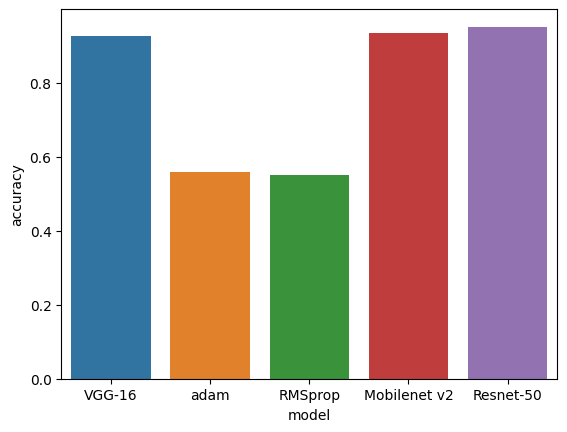

In [46]:
sns.barplot(data=results_df_transposed, x="model", y="accuracy",dodge='True')
plt.savefig('.accuracy for models')
#printing and saving accuracy figure

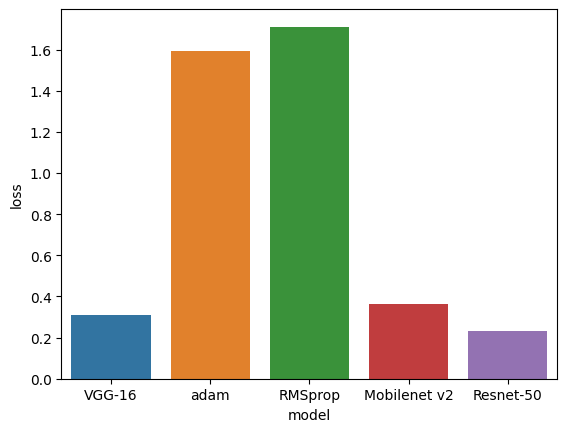

In [47]:
sns.barplot(data=results_df_transposed, x="model", y="loss",dodge='True')
plt.savefig('.loss for models')
#printing and saving loss figure 